In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load stars datasets

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


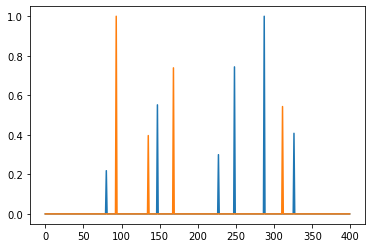

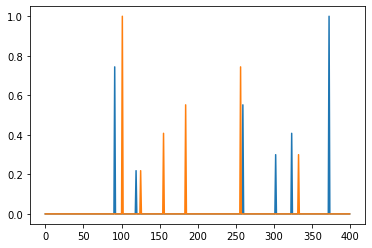

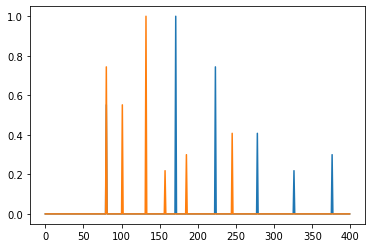

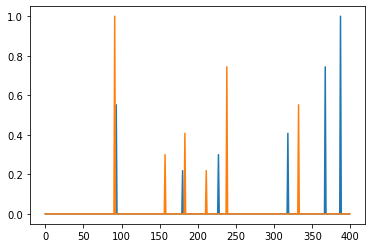

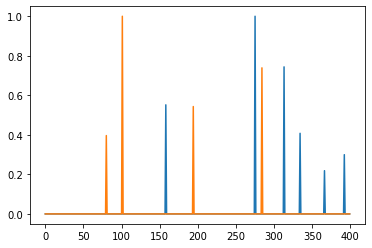

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
star_models = starmodels()

df_star_models = star_models.load(
    "/home/roberto/Downloads/evolutionTracks_line/parts_train/*_norm",
    batch_size=1,
    add_noise=False,
)

count = 0
for star in df_star_models:
    plt.plot(star[0][0, :, 0])
    plt.plot(star[0][0, :, 1])
    plt.show()
    if count == 4:
        break
    else:
        count += 1

In [3]:

# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*_norm", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
csv_delta_scuti

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv  \
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360   
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470   
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630   
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850   
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970   
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620   
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262   
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770   
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850   
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350   
10       HD15082        80   6.140000  7430   0.000    0.0000   0.0000   

    rho-gh17  
0    0.06570  
1    0.41400  
2    0.12550  
3    0.02830  
4    0.26000  
5    0.02986  
6    0.12400  
7    0.05660  
8    0.42300  
9    0.20500  
10   0.50700

In [4]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*_norm", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


HD             Name         TIC      V    Teff      L  e.L.   rho  \
0     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
1     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
2    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
3    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
4    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
5    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
6    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
7    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
8    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
9    24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
10   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
11   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
12   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
13   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
14   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
15   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
16   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
17   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
18   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
19   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
20   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
21   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
22   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
23   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
24   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
25   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
26   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
27   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
28   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
29   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
30   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
31   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
32   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
33   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
34   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
35   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
36   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
37   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
38   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
39   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
40   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
41   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
42   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
43   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
44   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
45   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
46  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
47  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
48  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
49  290750.0              NaN    11199304   9.77  9170.0  19

### Load pretrainned NN model

In [5]:
sepconv_mod = tf.keras.models.load_model(
    "/tmp/sepconvnn_tmp_dos_100/"
)
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400, 400)          1200      
_________________________________________________________________
dense_1 (Dense)              (None, 400, 200)          80200     
_________________________________________________________________
dense_2 (Dense)              (None, 400, 100)          20100     
_________________________________________________________________
dense_3 (Dense)              (None, 400, 50)           5050      
_________________________________________________________________
dropout (Dropout)            (None, 400, 50)           0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2

### Load $\rho$ Roche models

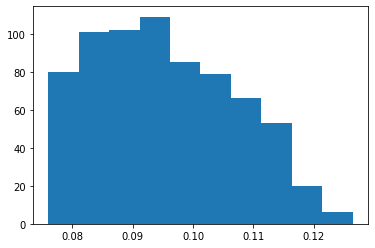

In [6]:
models = pd.read_csv(
    "/home/roberto/Downloads/evolutionTracks_line_rho_roche/models_params.csv",
    header=None,
    names=["Teff", "Dnu", "L_must", "rho_roche"],
)


def get_avg_rho_roche(teff, l, e_teff=300, e_l=1):
    """
    Get rho from Roche models by constrainning star models based
    on L and Teff. If there is not rsults, an adaptative search
    is performed
    """
    id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
    id_l = models["L_must"].between(l - e_l, l + e_l, inclusive=True)
    max_adaptative_iters = 1
    iters_count = 0
    while len(models[(id_teff & id_l)]) == 0 and iters_count < max_adaptative_iters :
        e_teff += 0
        id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
        iters_count += 1
        print(" ***warning, adaptative step performed on star models rho Roche search")
    return models[(id_teff & id_l)]["rho_roche"]

plt.hist(get_avg_rho_roche(8920.860521, 60))
plt.show()

In [7]:
models.head()

Teff       Dnu     L_must  rho_roche
0   9320.860521  2.922405  66.949234   0.110034
1  10157.683269  4.124967  58.663354   0.225869
2   9607.163384  3.228179  64.706039   0.138940
3  10372.144985  4.588722  55.802210   0.276591
4   9494.226367  3.141663  65.651536   0.126560

## Results for 11 Binary DS Stars

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CID100866999


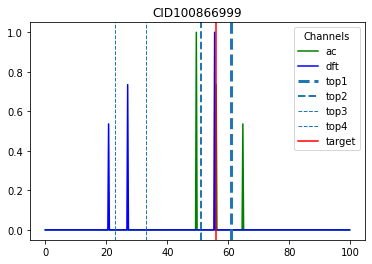

kic4544587


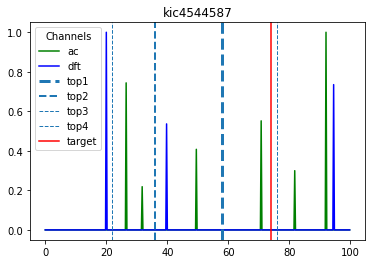

KIC8262223


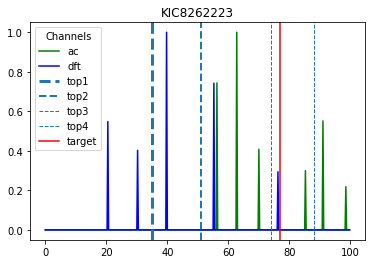

kic10661783


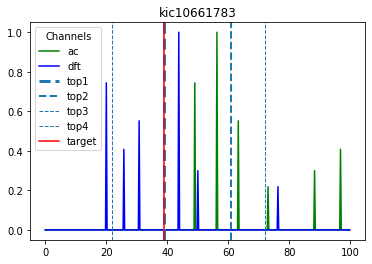

HD172189


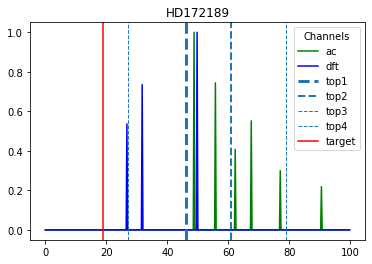

KIC3858884


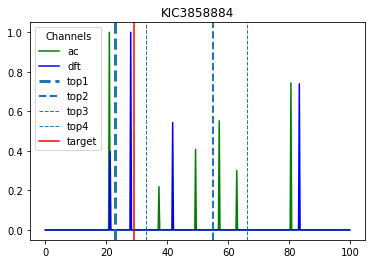

KIC9851944


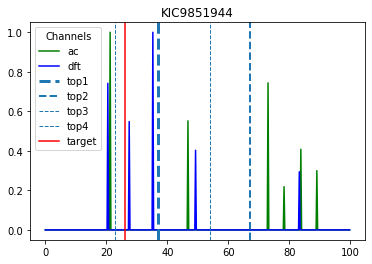

HD159561


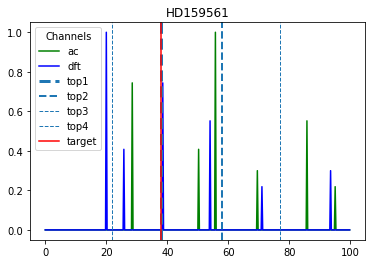

KIC10080943


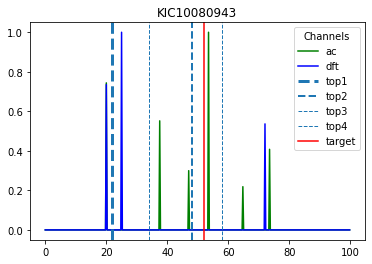

CID105906206


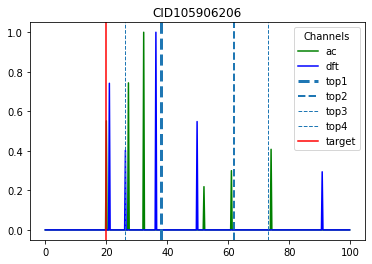

HD15082


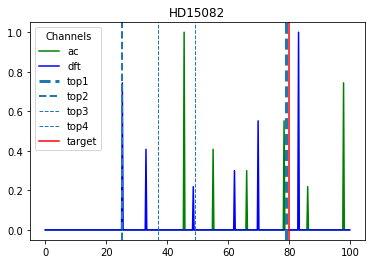

In [8]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=True,
)
df_results_delta_scuti.id = df_results_delta_scuti.id.str.upper()

In [9]:
# super simple model
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 2)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(df_delta_scuti, epochs=10)
"""

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(400, 2)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(100, activation='softmax')\n])\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\nmodel.fit(df_delta_scuti, epochs=10)\n"

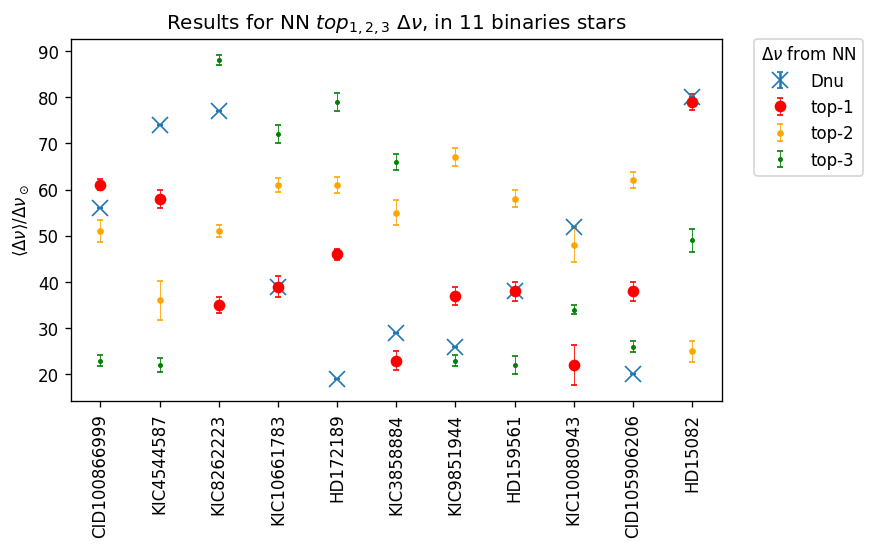

In [10]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [11]:
df_results_delta_scuti_merged = df_results_delta_scuti.merge(csv_delta_scuti , left_on="id", right_on="ID", how="left").drop('ID', 1)
df_results_delta_scuti_merged

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0   CID100866999         56   61  1.187703   51  2.376402   23  1.199302   33   
1     KIC4544587         74   58  1.991820   36  4.190093   22  1.551676   76   
2     KIC8262223         77   35  1.770544   51  1.292087   88  1.048285   74   
3    KIC10661783         39   39  2.281445   61  1.457704   72  1.976154   22   
4       HD172189         19   46  1.223966   61  1.722280   79  1.919894   27   
5     KIC3858884         29   23  2.097927   55  2.656410   66  1.801406   33   
6     KIC9851944         26   37  1.965340   67  1.950838   23  1.219989   54   
7       HD159561         38   38  2.097622   58  1.866582   22  1.992352   77   
8    KIC10080943         52   22  4.273678   48  3.737807   34  0.925139   58   
9   CID105906206         20   38  2.074704   62  1.754890   26  1.114370   73   
10       HD15082         80   79  1.766624   25  2.302921   49  2.519264   37   

      e-top4  ...  e-rho-top3   rho-top4 e-rho-top4  Dnu_muHz          L  \
0   0.866850  ...    0.014468  0.0932276   0.029686        56   3.865000   
1   1.826543  ...    0.013245   0.502794   0.157621        74   6.475306   
2   2.028784  ...    0.211647   0.476425   0.149399        77   5.139949   
3   2.483448  ...    0.141401  0.0410998   0.013245        39  29.304625   
4   1.555273  ...    0.170372  0.0621586   0.019904        19  29.942319   
5   0.873187  ...    0.118742  0.0932276   0.029686        29  21.520774   
6   3.028298  ...    0.014468   0.252105   0.079417        26  60.062351   
7   4.650950  ...    0.013245   0.516247   0.161815        38  24.642612   
8   2.299545  ...    0.031506   0.291253   0.091640        52   7.085301   
9   1.906689  ...    0.018463   0.463509   0.145372        20   9.396579   
10  1.591288  ...    0.065380   0.117466   0.037296        80   6.140000   

    Teff L.Ltot  parallax       mv  rho-gh17  
0   7300    NaN    0.5654  15.0970   0.26000  
1   7750  0.332    1.3600  10.8470   0.41400  
2   9128  0.900    0.9832  12.8850   0.42300  
3   7764  0.937    1.9400   9.5630   0.12550  
4   7750  0.702    2.2700   8.8850   0.02830  
5   6606  0.470    1.7800   9.3360   0.06570  
6   6902  0.500    0.4100  11.4770   0.05660  
7   8047  1.000   67.1300   2.1262   0.12400  
8   7480  0.500    1.0600  11.7350   0.20500  
9   6750  0.940    0.9901  12.2620   0.02986  
10  7430  0.000    0.0000   0.0000   0.50700  

[11 rows x 29 columns]

#### Select the closest $\text{top}_1$ or $\text{top}_2$ to the RM relation

In [12]:
def check_dnu_in_RM_relation(dnu, rho):
    """
    """
    # Get rho with upper and lower limits
    rs = get_rho(dnu / dnu_sun)
    rs_upper = get_rho_upper_bound(dnu / dnu_sun)
    rs_lower = get_rho_lower_bound(dnu / dnu_sun)

    # Check if proposed rho is inside bands
    if rho >= rs_lower and rho <= rs_upper:
        return True
    else:
        return False


df_results_delta_scuti_merged[["top1", "rho-gh17"]].apply(
    lambda x: check_dnu_in_RM_relation(x["top1"], x["rho-gh17"]), axis=1
)

0      True
1     False
2     False
3      True
4     False
5     False
6     False
7      True
8     False
9     False
10     True
dtype: bool

In [13]:
# Select best from top1, top1/2 or top1*2
tops_ds = inferences.select_best_top1(df_results_delta_scuti_merged, target_column="rho-gh17")
print(tops_ds)

[61 58 70 39 23.0 23 18.5 38 44 19.0 79]


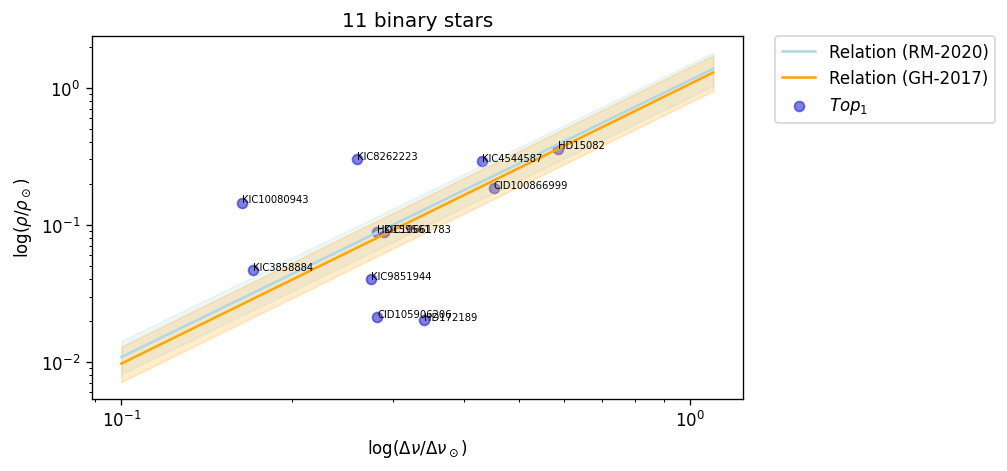

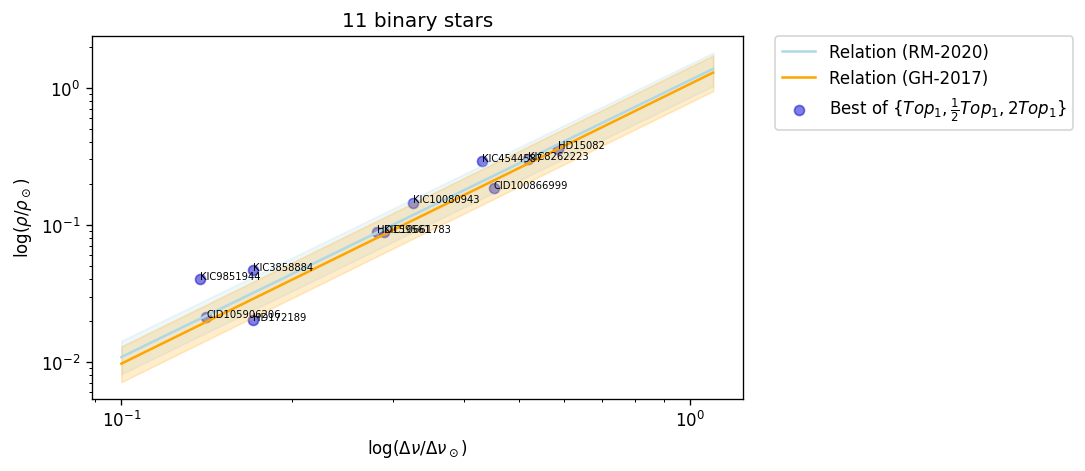

In [14]:
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top1"].values.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="$Top_1$",
)

inferences.plot_relation_rodriguez(
    dnus=tops_ds.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
)

## Results for 57 Bedding stars


tess2018234235059-s0002-0000000224284988-0121-s_lc_det


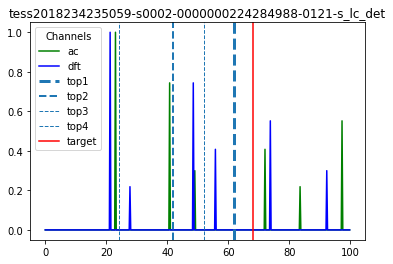

tess2018319095959-s0005-0000000348792358-0125-s_lc_det


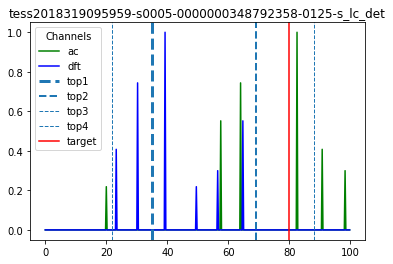

tess2018319095959-s0005-0000000071134596-0125-s_lc_det


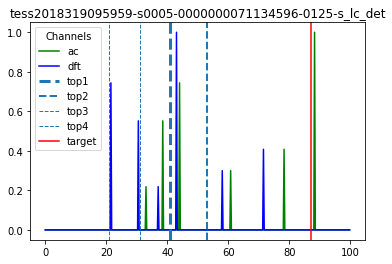

tess2019169103026-s0013-0000000269792989-0146-s_lc_det


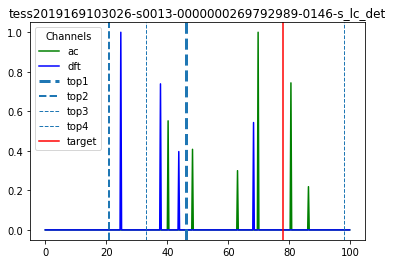

tess2018319095959-s0005-0000000000589826-0125-s_lc_det


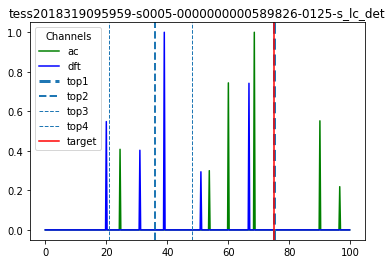

tess2018263035959-s0003-0000000159895674-0123-s_lc_det


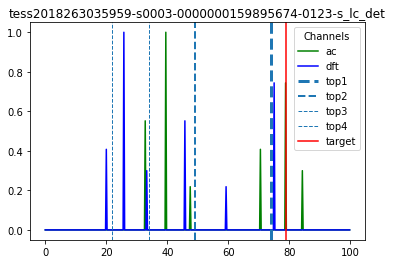

tess2019032160000-s0008-0000000332516661-0136-s_lc_det


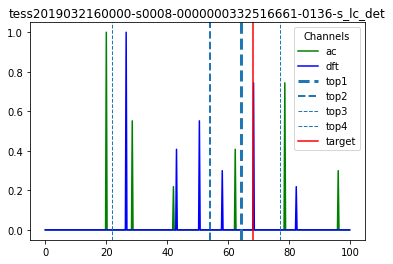

tess2018292075959-s0004-0000000274038922-0124-s_lc_det


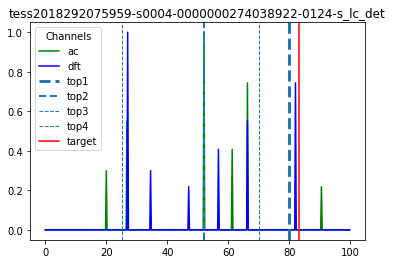

tess2018349182459-s0006-0000000032763133-0126-s_lc_det


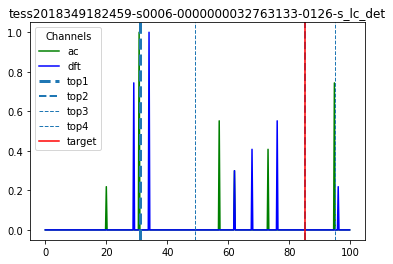

tess2019058134432-s0009-0000000463556278-0139-s_lc_det


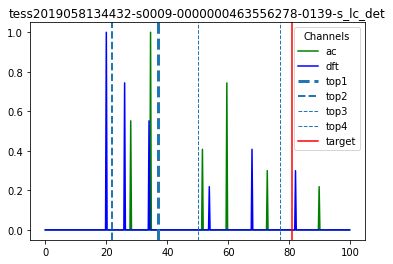

tess2018263035959-s0003-0000000231014033-0123-s_lc_det


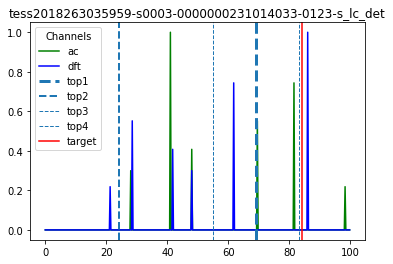

tess2018319095959-s0005-0000000034197596-0125-s_lc_det


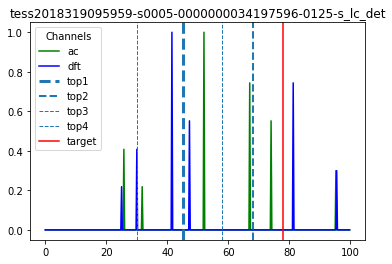

tess2019006130736-s0007-0000000284348793-0131-s_lc_det


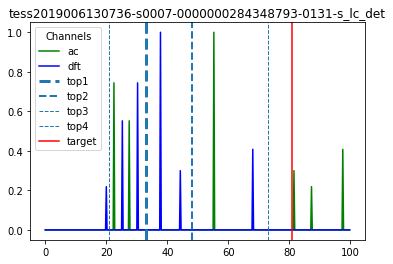

tess2018263035959-s0003-0000000122615966-0123-s_lc_det


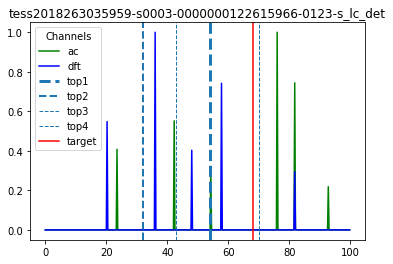

tess2018319095959-s0005-0000000431695696-0125-s_lc_det


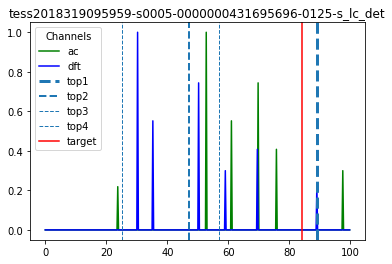

tess2018319095959-s0005-0000000306773428-0125-s_lc_det


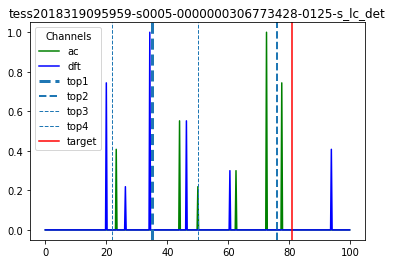

tess2018349182459-s0006-0000000124429243-0126-s_lc_det


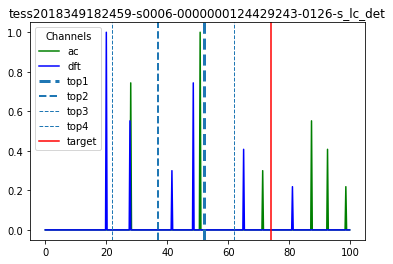

tess2018263035959-s0003-0000000043363194-0123-s_lc_det


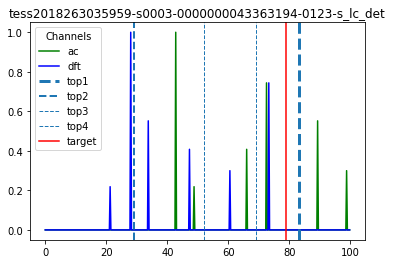

tess2019058134432-s0009-0000000260161111-0139-s_lc_det


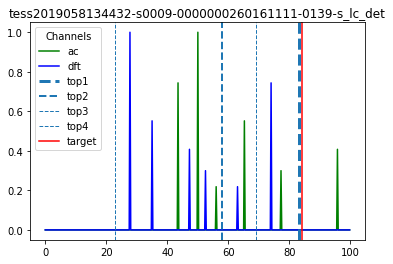

tess2018319095959-s0005-0000000044645679-0125-s_lc_det


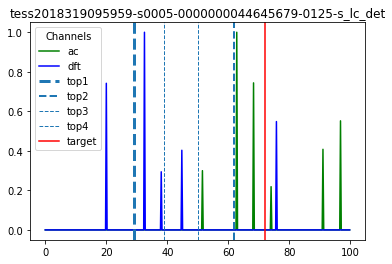

tess2019058134432-s0009-0000000388351327-0139-s_lc_det


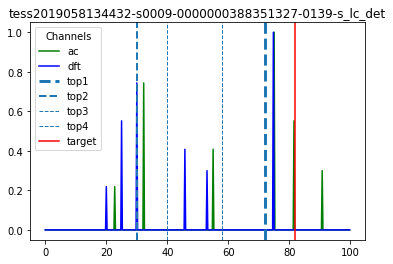

tess2018349182459-s0006-0000000034737955-0126-s_lc_det


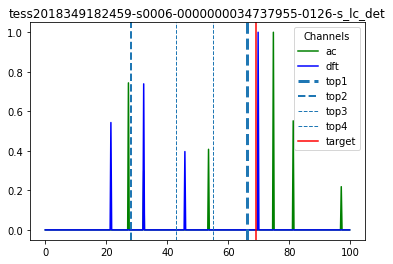

tess2018319095959-s0005-0000000024344701-0125-s_lc_det


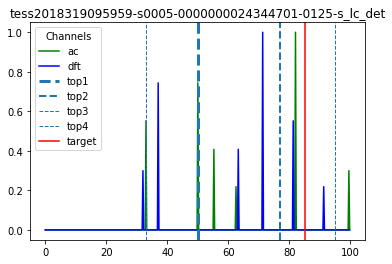

tess2018263035959-s0003-0000000122686610-0123-s_lc_det


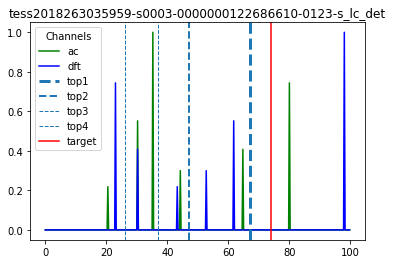

tess2018349182459-s0006-0000000037498433-0126-s_lc_det


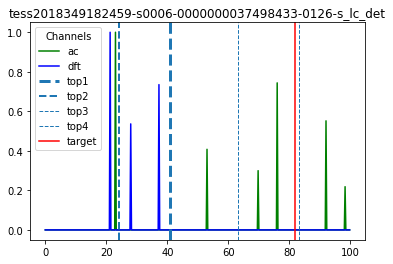

tess2019058134432-s0009-0000000287347434-0139-s_lc_det


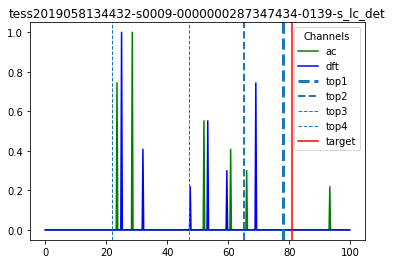

tess2018349182459-s0006-0000000124381332-0126-s_lc_det


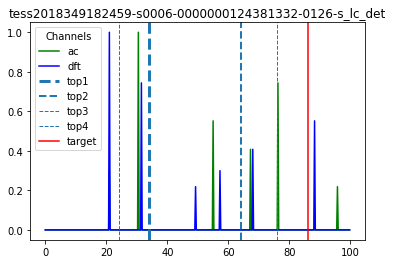

tess2019032160000-s0008-0000000340358522-0136-s_lc_det


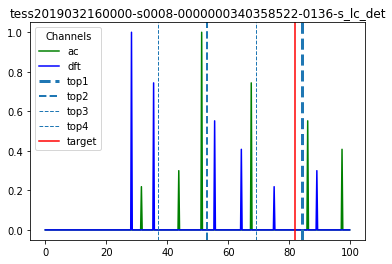

tess2019032160000-s0008-0000000176400189-0136-s_lc_det


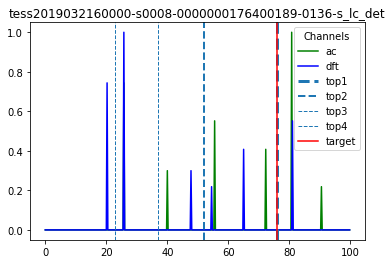

tess2018349182459-s0006-0000000148228220-0126-s_lc_det


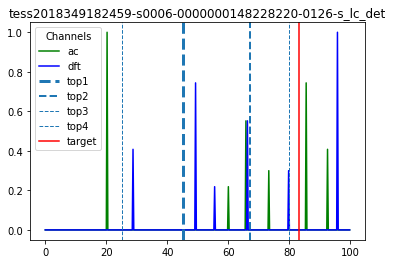

tess2018319095959-s0005-0000000246902545-0125-s_lc_det


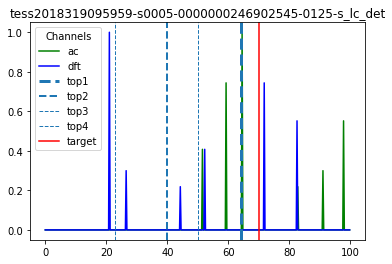

tess2018319095959-s0005-0000000259675399-0125-s_lc_det


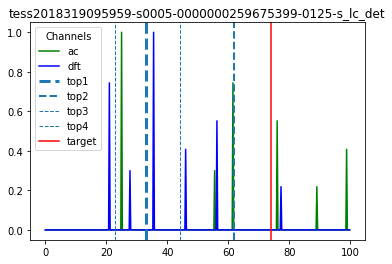

tess2018319095959-s0005-0000000459942890-0125-s_lc_det


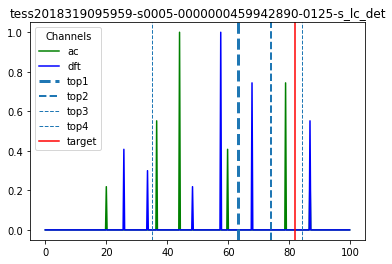

tess2018319095959-s0005-0000000100531058-0125-s_lc_det


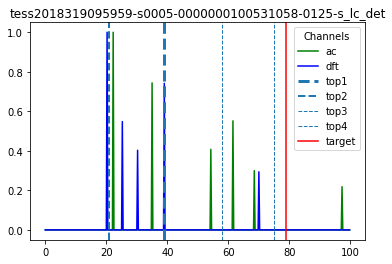

tess2018319095959-s0005-0000000349645354-0125-s_lc_det


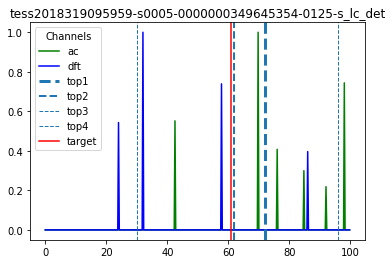

tess2018349182459-s0006-0000000294157254-0126-s_lc_det


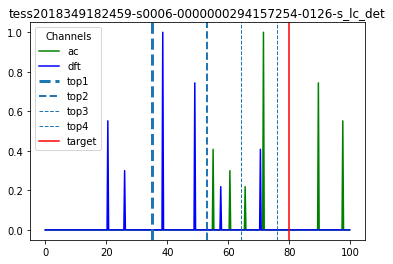

tess2018319095959-s0005-0000000009147509-0125-s_lc_det


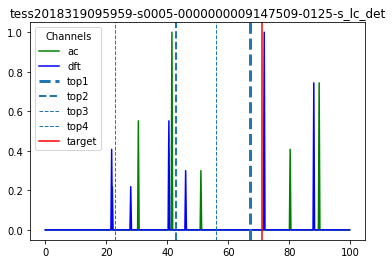

tess2018234235059-s0002-0000000327996759-0121-s_lc_det


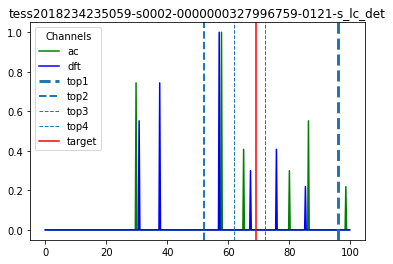

tess2018349182459-s0006-0000000011199304-0126-s_lc_det


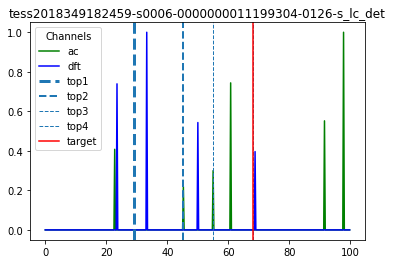

tess2018319095959-s0005-0000000031475829-0125-s_lc_det


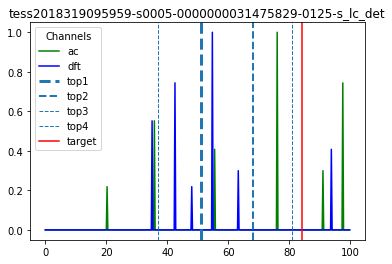

tess2018263035959-s0003-0000000150272131-0123-s_lc_det


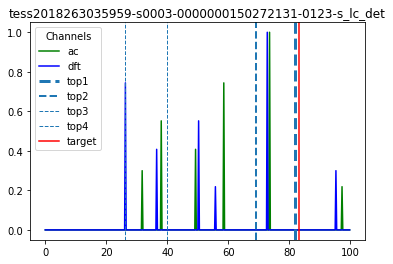

tess2018234235059-s0002-0000000229139161-0121-s_lc_det


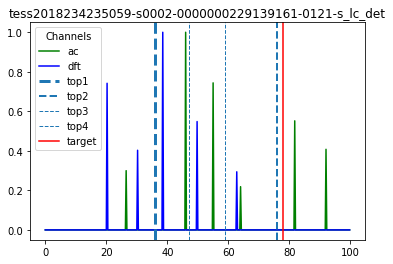

tess2018349182459-s0006-0000000117766204-0126-s_lc_det


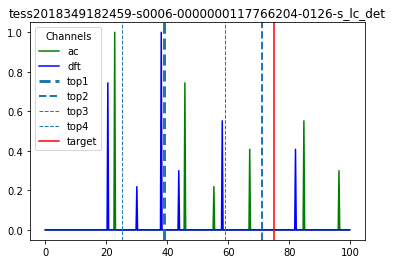

tess2018319095959-s0005-0000000255548143-0125-s_lc_det


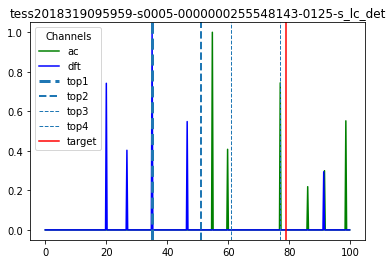

tess2018319095959-s0005-0000000316920092-0125-s_lc_det


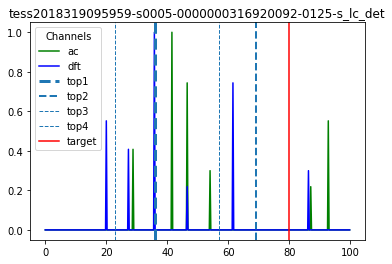

tess2019006130736-s0007-0000000078492107-0131-s_lc_det


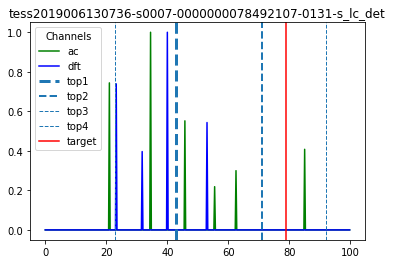

tess2019006130736-s0007-0000000270577175-0131-s_lc_det


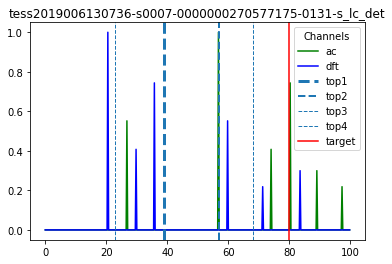

tess2019006130736-s0007-0000000112484997-0131-s_lc_det


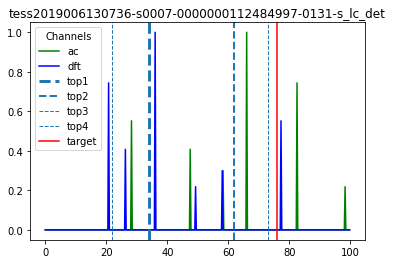

tess2018349182459-s0006-0000000172193026-0126-s_lc_det


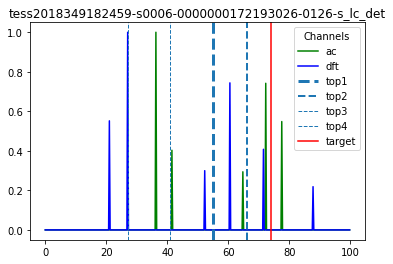

tess2018234235059-s0002-0000000316806320-0121-s_lc_det


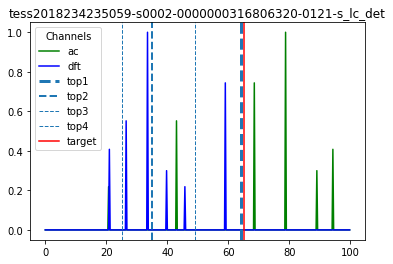

tess2018319095959-s0005-0000000242944780-0125-s_lc_det


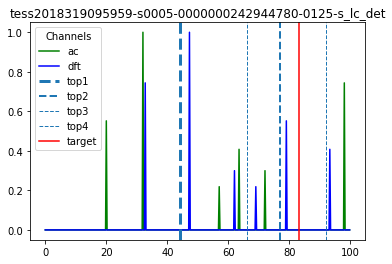

tess2018319095959-s0005-0000000143381070-0125-s_lc_det


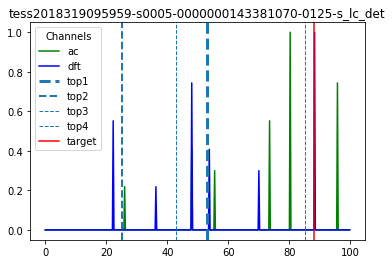

tess2019006130736-s0007-0000000278179191-0131-s_lc_det


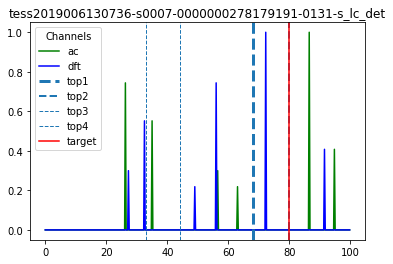

tess2018349182459-s0006-0000000408906554-0126-s_lc_det


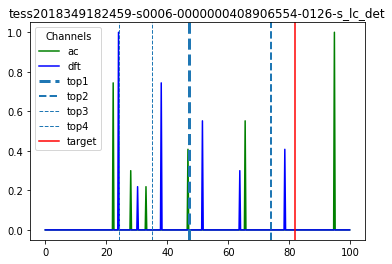

tess2018234235059-s0002-0000000281499618-0121-s_lc_det


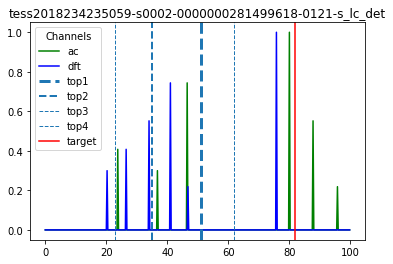

tess2018349182459-s0006-0000000011361473-0126-s_lc_det


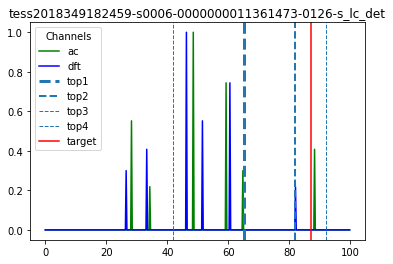

tess2018349182459-s0006-0000000282265535-0126-s_lc_det


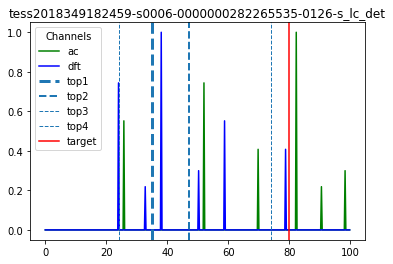

In [15]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=True,
)

In [16]:
df_results_bedding["TIC"] = df_results_bedding["id"].str.split("-").str[2].astype(int)
df_bedding_att = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=",", index_col=0
)
df_bedding_att
df_bedding_att = df_bedding_att.head(57)
df_bedding_att["TIC"] = df_bedding_att["TIC"].astype(int)

# Merge
df_results_bedding_merged = df_results_bedding.merge(
    df_bedding_att, left_on="TIC", right_on="TIC", how="left"
)

# Replace L and Teff Bedding values, for MAST values when NaN
df_results_bedding_merged.L.fillna(df_results_bedding_merged.L_mast, inplace=True)
df_results_bedding_merged.Teff.fillna(df_results_bedding_merged.Teff_mast, inplace=True)

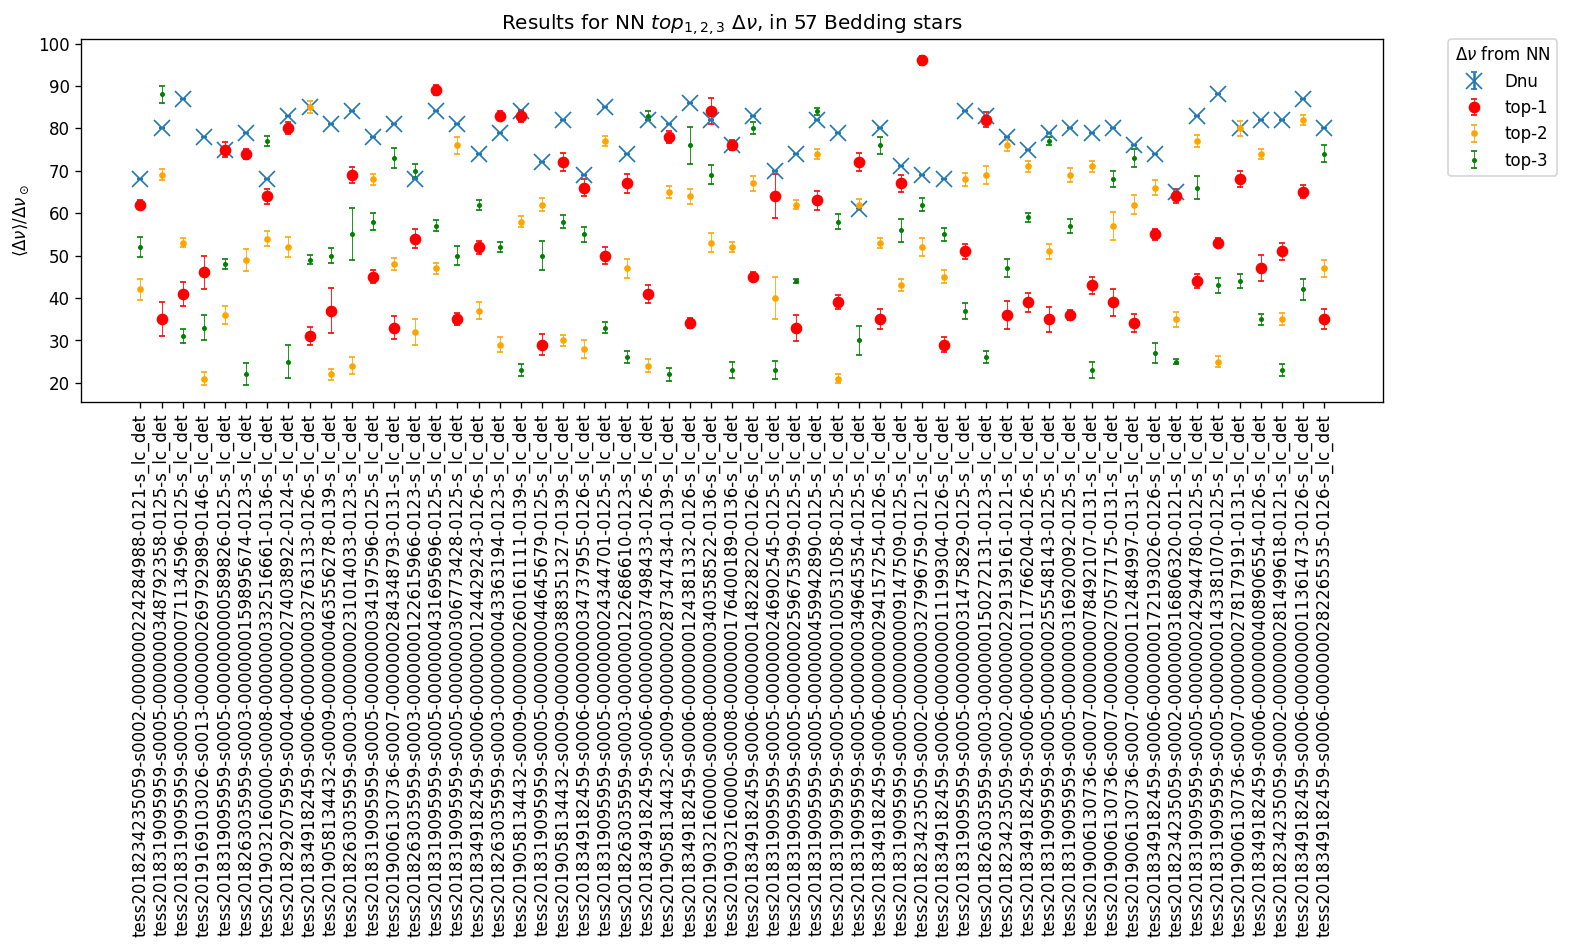

In [17]:
inf.plot_inferences(
    df_results_bedding_merged,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

In [18]:
df_results_bedding_merged["avg_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.average(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)

df_results_bedding_merged["sd_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)

df_results_bedding_merged

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


id dnu-target top1  \
0   tess2018234235059-s0002-0000000224284988-0121-...         68   62   
1   tess2018319095959-s0005-0000000348792358-0125-...         80   35   
2   tess2018319095959-s0005-0000000071134596-0125-...         87   41   
3   tess2019169103026-s0013-0000000269792989-0146-...         78   46   
4   tess2018319095959-s0005-0000000000589826-0125-...         75   75   
5   tess2018263035959-s0003-0000000159895674-0123-...         79   74   
6   tess2019032160000-s0008-0000000332516661-0136-...         68   64   
7   tess2018292075959-s0004-0000000274038922-0124-...         83   80   
8   tess2018349182459-s0006-0000000032763133-0126-...         85   31   
9   tess2019058134432-s0009-0000000463556278-0139-...         81   37   
10  tess2018263035959-s0003-0000000231014033-0123-...         84   69   
11  tess2018319095959-s0005-0000000034197596-0125-...         78   45   
12  tess2019006130736-s0007-0000000284348793-0131-...         81   33   
13  tess2018263035959-s0003-0000000122615966-0123-...         68   54   
14  tess2018319095959-s0005-0000000431695696-0125-...         84   89   
15  tess2018319095959-s0005-0000000306773428-0125-...         81   35   
16  tess2018349182459-s0006-0000000124429243-0126-...         74   52   
17  tess2018263035959-s0003-0000000043363194-0123-...         79   83   
18  tess2019058134432-s0009-0000000260161111-0139-...         84   83   
19  tess2018319095959-s0005-0000000044645679-0125-...         72   29   
20  tess2019058134432-s0009-0000000388351327-0139-...         82   72   
21  tess2018349182459-s0006-0000000034737955-0126-...         69   66   
22  tess2018319095959-s0005-0000000024344701-0125-...         85   50   
23  tess2018263035959-s0003-0000000122686610-0123-...         74   67   
24  tess2018349182459-s0006-0000000037498433-0126-...         82   41   
25  tess2019058134432-s0009-0000000287347434-0139-...         81   78   
26  tess2018349182459-s0006-0000000124381332-0126-...         86   34   
27  tess2019032160000-s0008-0000000340358522-0136-...         82   84   
28  tess2019032160000-s0008-0000000176400189-0136-...         76   76   
29  tess2018349182459-s0006-0000000148228220-0126-...         83   45   
30  tess2018319095959-s0005-0000000246902545-0125-...         70   64   
31  tess2018319095959-s0005-0000000259675399-0125-...         74   33   
32  tess2018319095959-s0005-0000000459942890-0125-...         82   63   
33  tess2018319095959-s0005-0000000100531058-0125-...         79   39   
34  tess2018319095959-s0005-0000000349645354-0125-...         61   72   
35  tess2018349182459-s0006-0000000294157254-0126-...         80   35   
36  tess2018319095959-s0005-0000000009147509-0125-...         71   67   
37  tess2018234235059-s0002-0000000327996759-0121-...         69   96   
38  tess2018349182459-s0006-0000000011199304-0126-...         68   29   
39  tess2018319095959-s0005-0000000031475829-0125-...         84   51   
40  tess2018263035959-s0003-0000000150272131-0123-...         83   82   
41  tess2018234235059-s0002-0000000229139161-0121-...         78   36   
42  tess2018349182459-s0006-0000000117766204-0126-...         75   39   
43  tess2018319095959-s0005-0000000255548143-0125-...         79   35   
44  tess2018319095959-s0005-0000000316920092-0125-...         80   36   
45  tess2019006130736-s0007-0000000078492107-0131-...         79   43   
46  tess2019006130736-s0007-0000000270577175-0131-...         80   39   
47  tess2019006130736-s0007-0000000112484997-0131-...         76   34   
48  tess2018349182459-s0006-0000000172193026-0126-...         74   55   
49  tess2018234235059-s0002-0000000316806320-0121-...         65   64   
50  tess2018319095959-s0005-0000000242944780-0125-...         83   44   
51  tess2018319095959-s0005-0000000143381070-0125-...         88   53   
52  tess2019006130736-s0007-0000000278179191-0131-...         80   68   
53  tess2018349182459-s0006-0000000408906554-0126-...         82   47   
54  tess2018234235059-s0002-00000002

/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


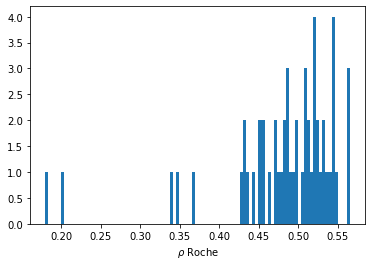

In [19]:
plt.hist(df_results_bedding_merged["avg_rho_roche"], bins=100)
plt.xlabel("$\\rho$ Roche")
plt.show()

In [20]:
tops_bedding = inferences.select_best_top1(df_results_bedding_merged, target_column="avg_rho_roche")
print(tops_bedding)

[62 70 82 92 75 74 64 80 62 37 69 90 66 54 89 70 104 83 83 58 72 66 100 67
 82 78 68 84 38.0 45 64 66 63 78 72 70 67 96 58 102 82 72 78 70 72 86 78
 68 55 64 88 106 68 94 102 65 35]


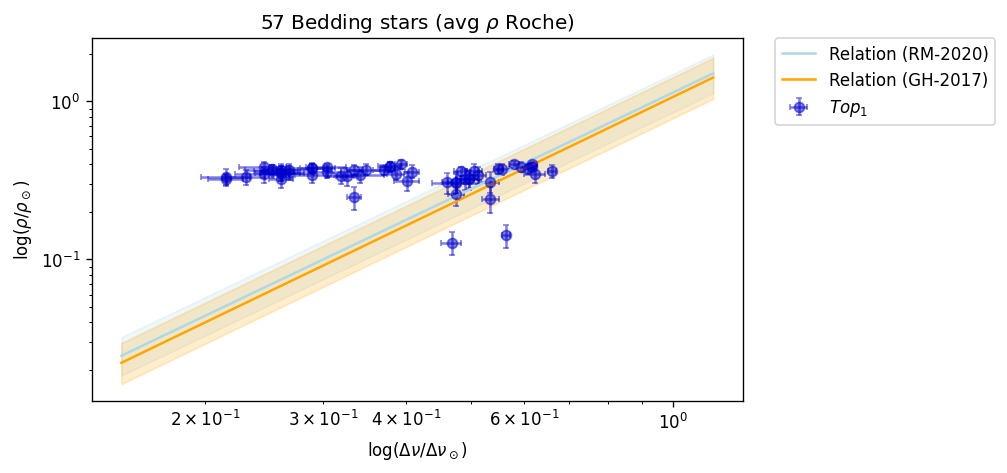

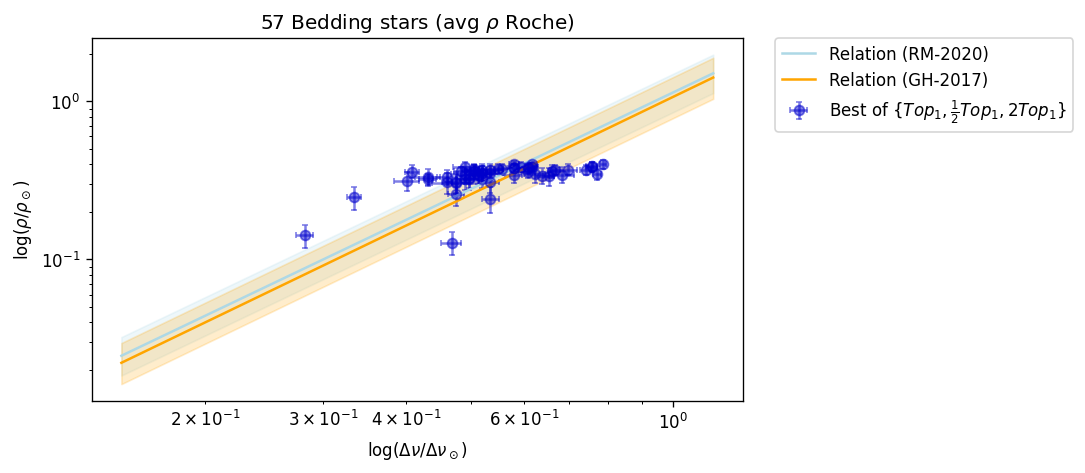

In [21]:
inferences.plot_relation_rodriguez(
    dnus=df_results_bedding_merged["top1"].values.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.15, 1.3),
)

inferences.plot_relation_rodriguez(
    dnus=tops_bedding.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.15, 1.3),
)

### Histogram of $\rho$ Roche distributions for every single star (57 Bedding stars)

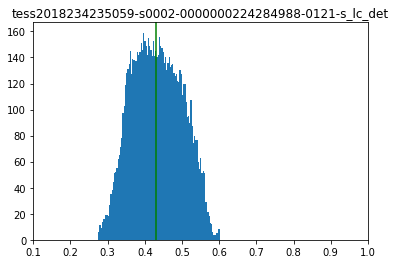

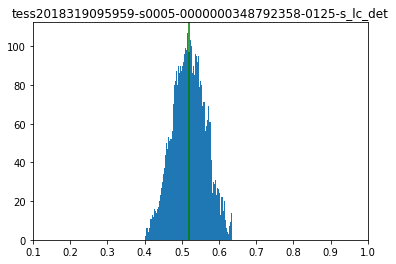

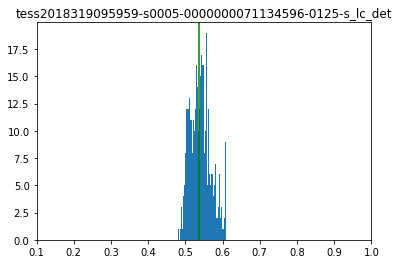

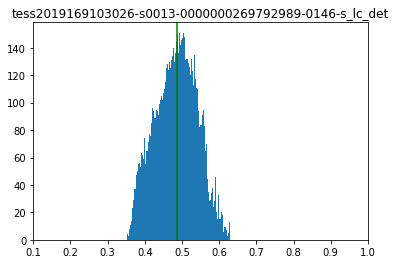

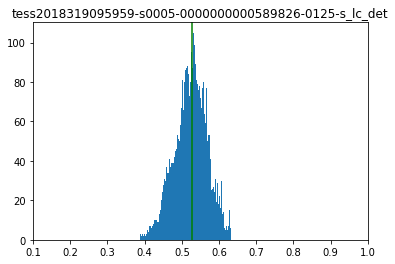

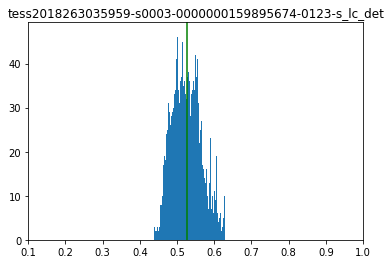

In [22]:
for i, row in df_results_bedding_merged.iterrows():
    avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
    plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
    plt.axvline(x=avg_rho_roche, color="green")
    plt.title(row["id"])
    plt.xlim(0.1, 1.0)
    plt.show()
    if i == 5:
        break

# CoRoT Stars

In [23]:
# Read datasets of preprocessed stars
df_corot = corot()
df_cor = df_corot.load("../../astronn/data/corot/preprocessed/*_norm", batch_size=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


102641760.0


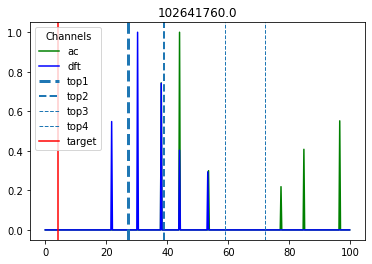

102620865.0


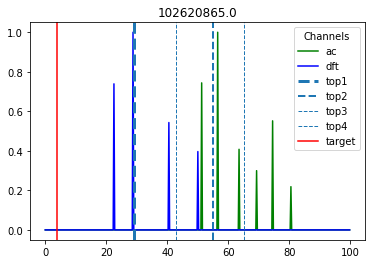

102694610.0


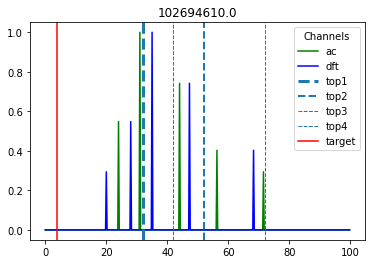

102599598.0


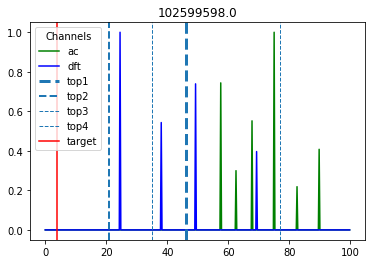

102712421.0


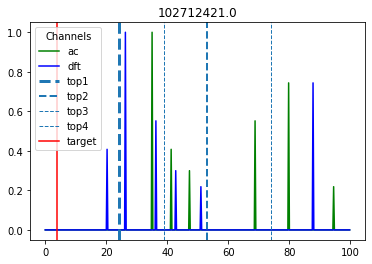

102587554.0


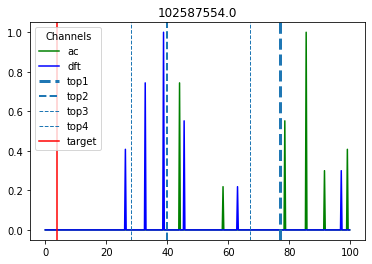

102753236.0


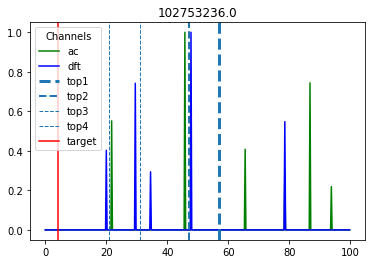

102790482.0


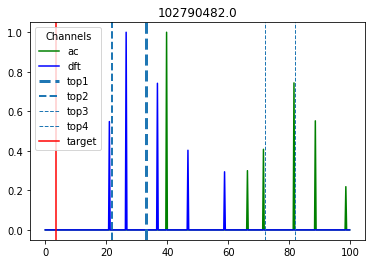

102728240.0


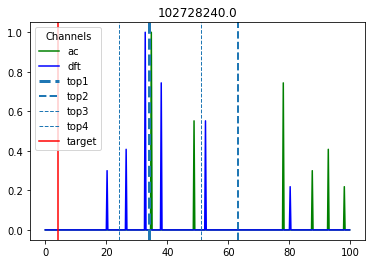

102721716.0


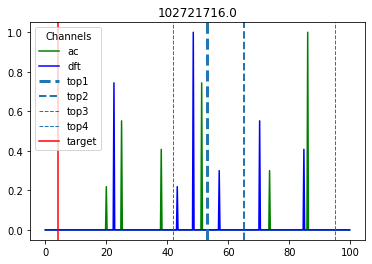

102649349.0


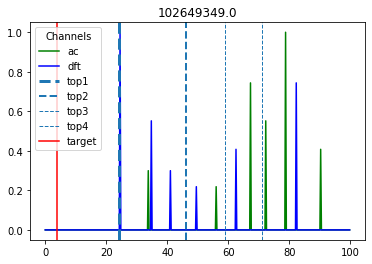

102651129.0


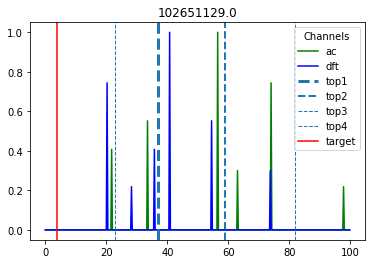

102580193.0


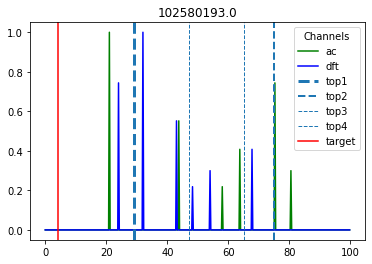

102723128.0


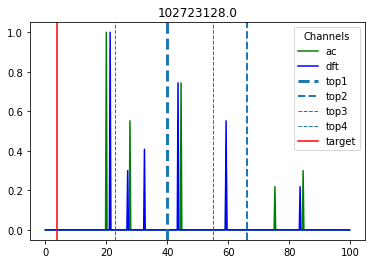

102688713.0


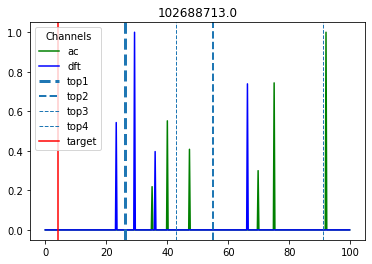

102702314.0


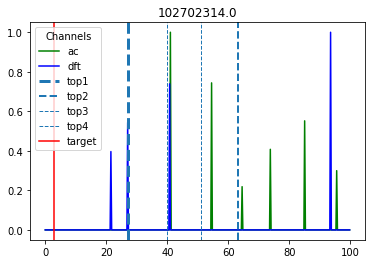

102703251.0


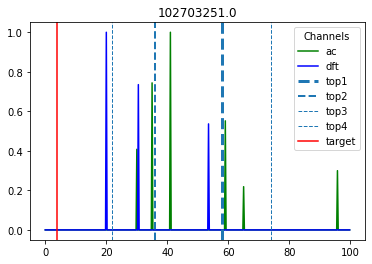

102661211.0


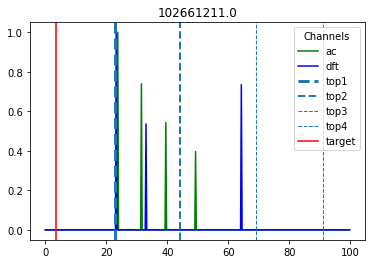

102618519.0


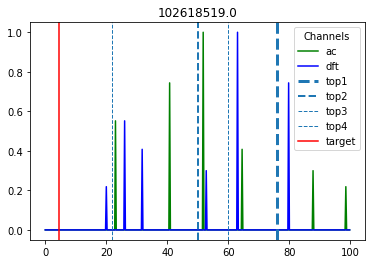

102775698.0


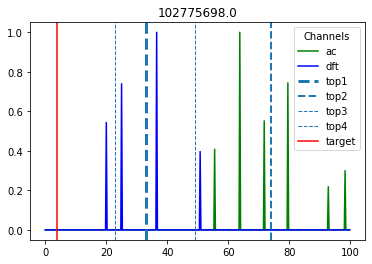

102702932.0


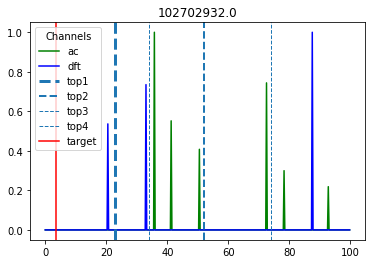

102742700.0


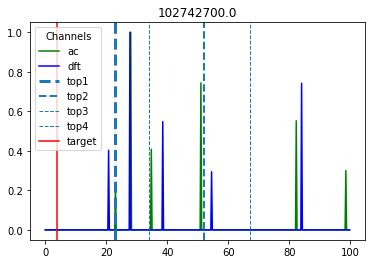

102584233.0


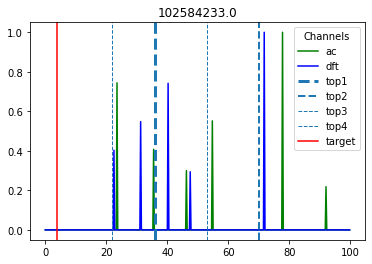

102686153.0


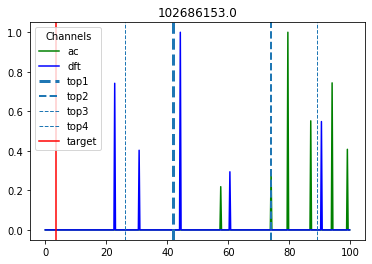

102634888.0


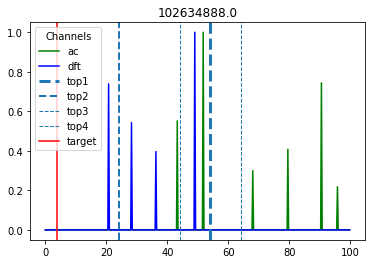

102706800.0


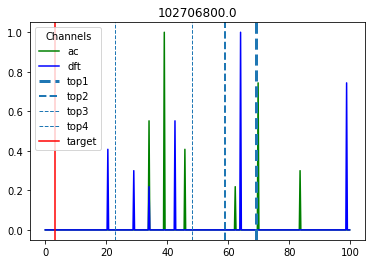

102596121.0


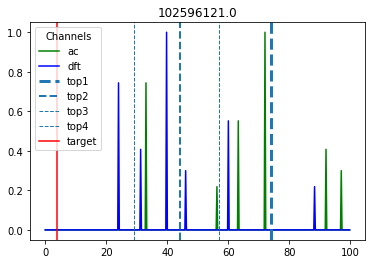

102650434.0


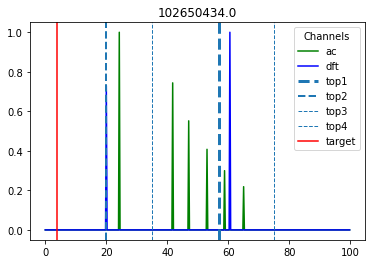

102704304.0


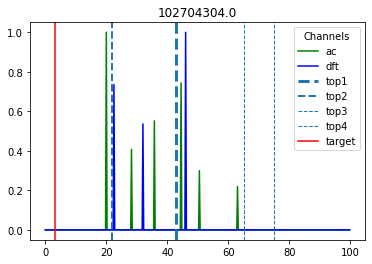

102589546.0


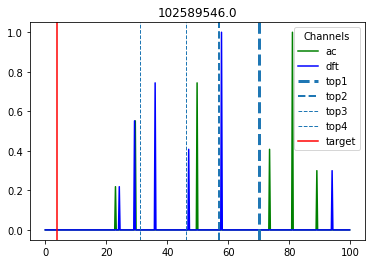

101723199.0


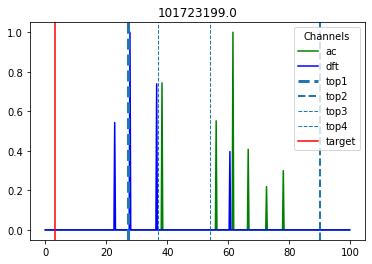

102710813.0


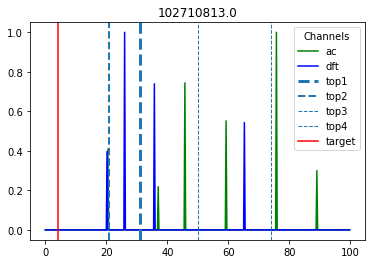

102773976.0


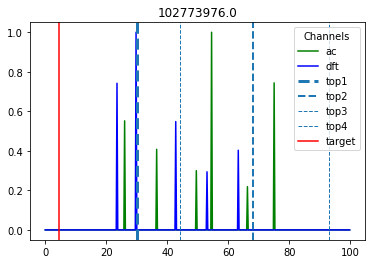

102603176.0


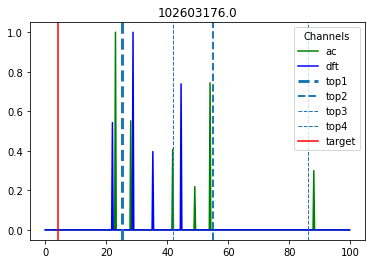

102622725.0


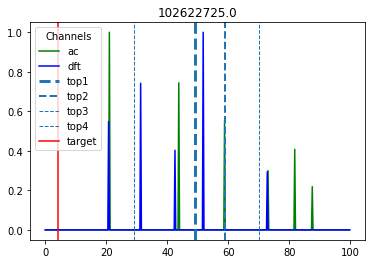

102678628.0


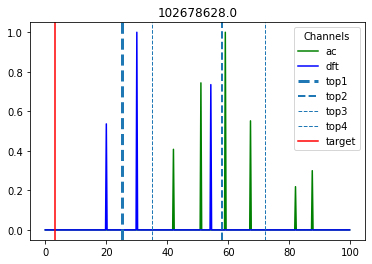

102690176.0


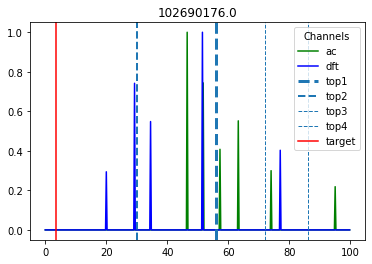

102687709.0


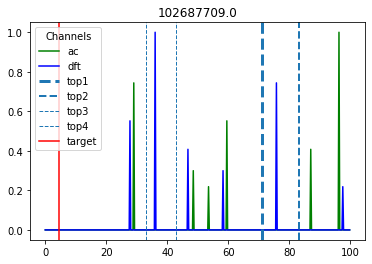

102677987.0


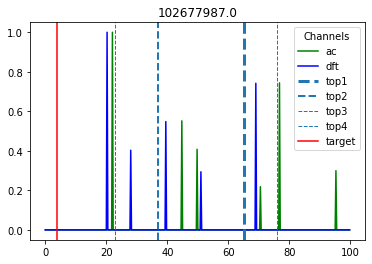

102786753.0


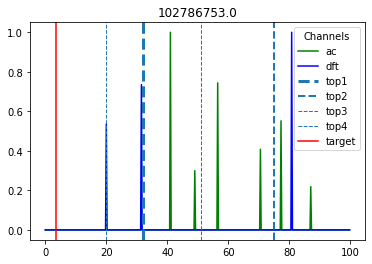

102761878.0


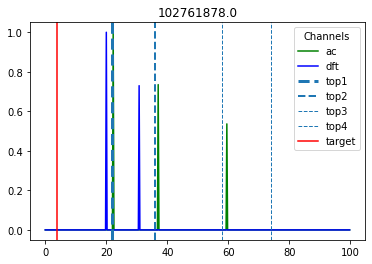

102655408.0


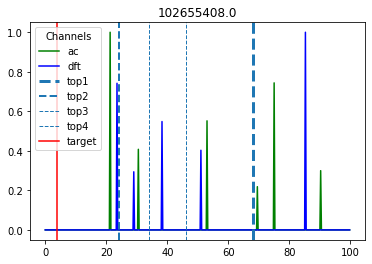

102598868.0


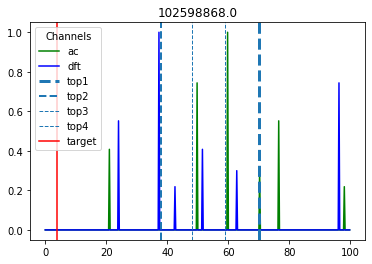

102607188.0


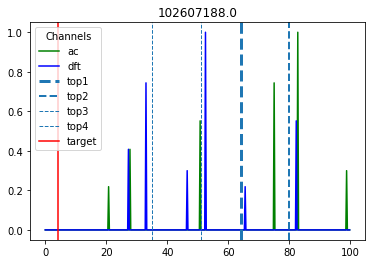

102657423.0


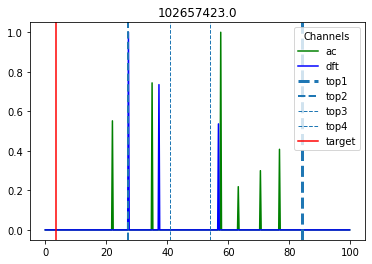

102743992.0


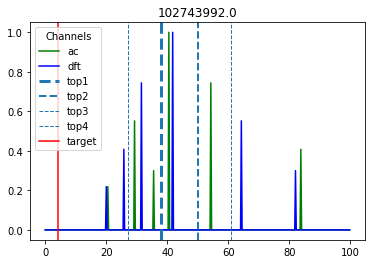

102591062.0


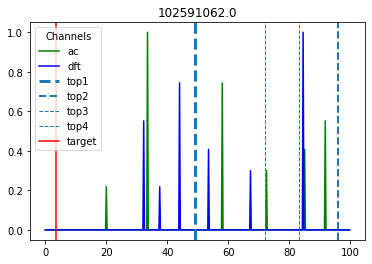

102670461.0


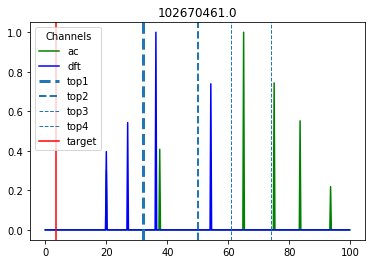

102639650.0


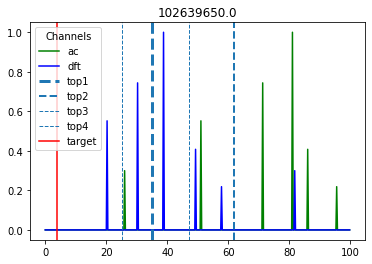

102647323.0


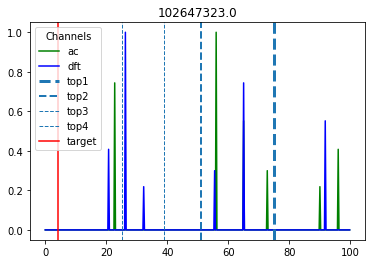

102785246.0


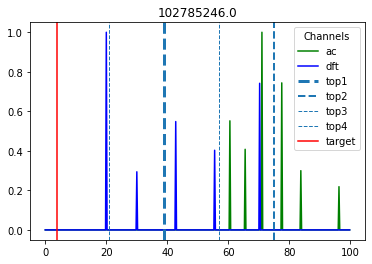

102656251.0


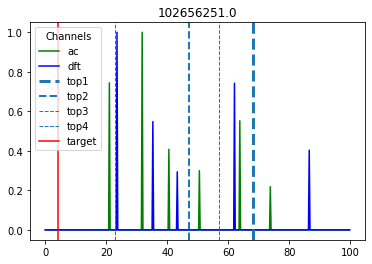

102636829.0


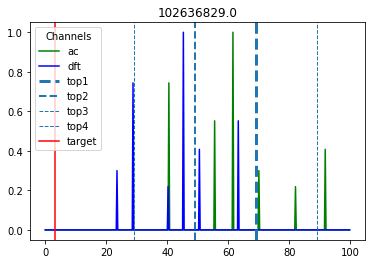

102600012.0


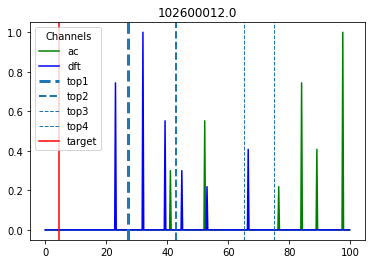

102673795.0


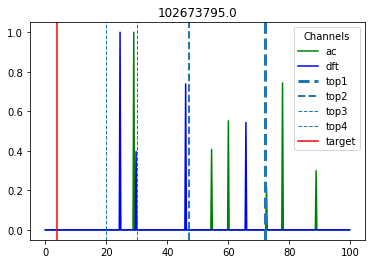

102691322.0


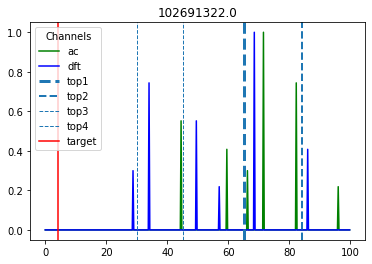

102637079.0


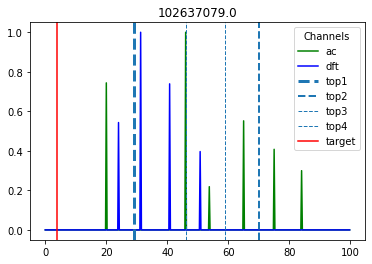

102688156.0


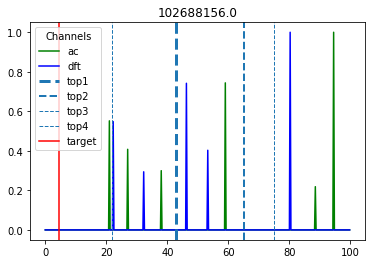

102639464.0


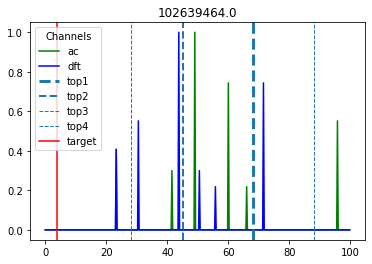

102745499.0


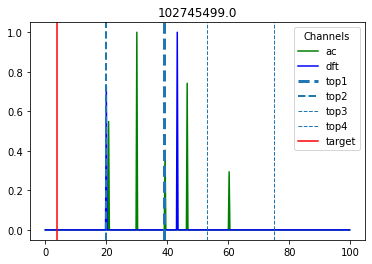

102576929.0


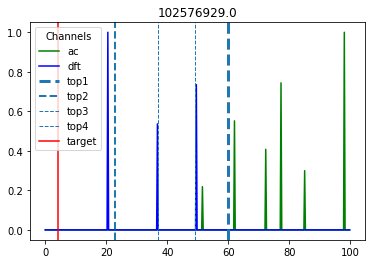

102575808.0


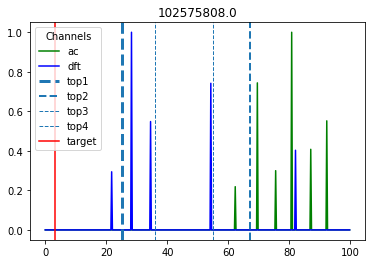

102642516.0


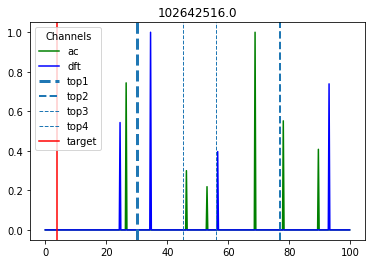

102691789.0


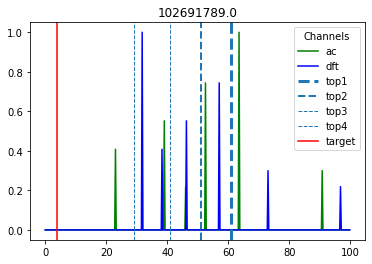

102794872.0


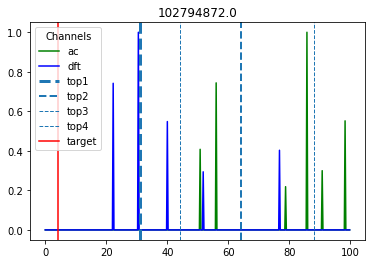

102787451.0


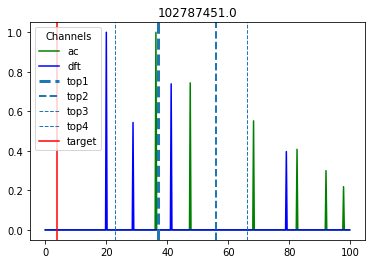

102788412.0


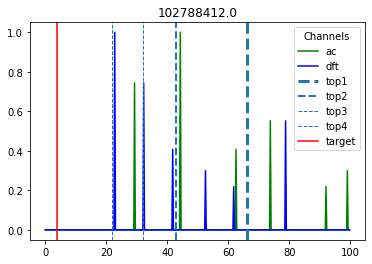

102623864.0


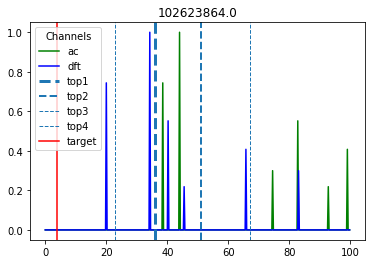

102733521.0


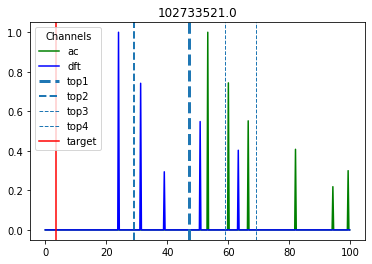

102624107.0


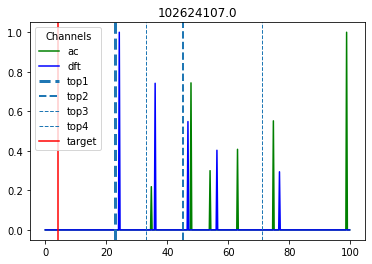

102675756.0


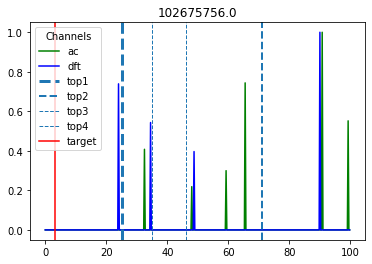

102671284.0


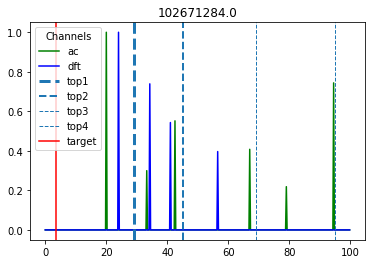

102669422.0


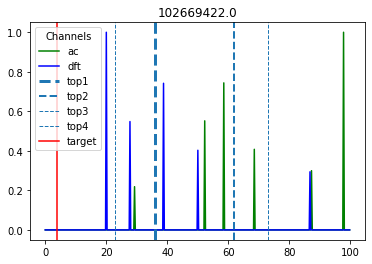

102724195.0


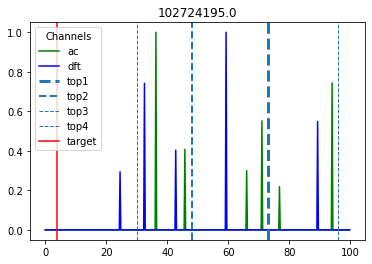

102775243.0


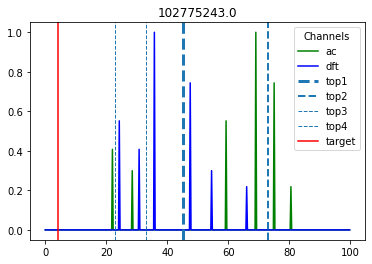

In [24]:
df_results_corot = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_cor,
    take_number=75,
    csv_L=None,
    debug=True,
    dnu_target=False
)

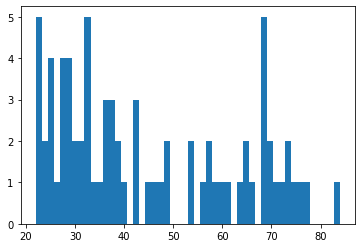

In [25]:
plt.hist(df_results_corot["top1"], bins=50)
plt.show()

In [26]:
# Add L and Teff directly from star data
df_results_corot["L"] = np.nan
df_results_corot["Teff"] = np.nan

for star in df_cor.take(75):
    #id = int(star[0].numpy()[0].decode("utf-8"))
    id = star[0].numpy()[0].decode("utf-8")
    # Loc star
    df_results_corot.loc[df_results_corot.id == str(id), ["Teff"]] = star[3].numpy()[0]
    df_results_corot.loc[df_results_corot.id == str(id), ["L"]] = star[4].numpy()[0]

In [27]:
"""
df_results_corot[df_results_corot['L'] == 0]

df_results_corot["L_mast"] = np.nan
df_results_corot["Teff_mast"] = np.nan


from astroquery.mast import Observations, Catalogs

for star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:
    try:
        catalogTIC = Catalogs.query_object(
            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2
        )
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]
    except:
        print("Problems in %s" % star_name)
"""


'\ndf_results_corot[df_results_corot[\'L\'] == 0]\n\ndf_results_corot["L_mast"] = np.nan\ndf_results_corot["Teff_mast"] = np.nan\n\n\nfrom astroquery.mast import Observations, Catalogs\n\nfor star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:\n    try:\n        catalogTIC = Catalogs.query_object(\n            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2\n        )\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]\n    except:\n        print("Problems in %s" % star_name)\n'

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_results_corot)

             id  logg-target top1    e-top1 top2    e-top2 top3    e-top3  \
0   102641760.0        4.300   27  2.510284   39  2.067821   59  2.666047   
1   102620865.0        3.975   29  2.523860   55  1.997692   65  2.090060   
2   102694610.0        3.700   32  4.557131   52  1.888906   42  1.956964   
3   102599598.0        4.000   46  1.994059   21  1.407976   35  1.988114   
4   102712421.0        3.950   24  1.543020   53  1.133717   74  1.272433   
5   102587554.0        3.700   77  1.430905   40  2.105226   28  3.236000   
6   102753236.0        4.100   57  1.953985   47  2.057480   31  2.461025   
7   102790482.0        3.475   33  2.117042   22  1.786138   82  1.230477   
8   102728240.0        4.200   34  2.314368   63  1.399812   51  3.513422   
9   102721716.0        4.150   53  1.867574   65  1.516777   42  0.901237   
10  102649349.0        3.950   24  1.475666   46  1.606511   71  1.243035   
11  102651129.0        3.750   37  2.035752   59  1.334588   82  1.356945   

In [29]:
"""
plt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])
plt.ylabel("Teff MAST")
plt.xlabel("Teff Paparó")
plt.show()
"""

'\nplt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])\nplt.ylabel("Teff MAST")\nplt.xlabel("Teff Paparó")\nplt.show()\n'

In [30]:
"""
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")
plt.legend()
plt.show()
"""

'\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")\nplt.legend()\nplt.show()\n'

In [31]:
df_results_corot["avg_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(get_avg_rho_roche(x["Teff"], x["L"])), axis=1
)

"""
df_results_corot["sd_rho_roche"] = df_results_corot[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1) 
df_results_corot

"""
df_results_corot["sd_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(
        get_avg_rho_roche(x["Teff"], x["L"])
        - np.min(get_avg_rho_roche(x["Teff"], x["L"]))
    ),
    axis=1,
)
df_results_corot


df_results_corot

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***wa

id  logg-target top1    e-top1 top2    e-top2 top3    e-top3  \
0   102641760.0        4.300   27  2.510284   39  2.067821   59  2.666047   
1   102620865.0        3.975   29  2.523860   55  1.997692   65  2.090060   
2   102694610.0        3.700   32  4.557131   52  1.888906   42  1.956964   
3   102599598.0        4.000   46  1.994059   21  1.407976   35  1.988114   
4   102712421.0        3.950   24  1.543020   53  1.133717   74  1.272433   
..          ...          ...  ...       ...  ...       ...  ...       ...   
70  102675756.0        3.175   25  3.149321   71  2.501897   46  1.578687   
71  102671284.0        3.650   29  1.934141   45  1.559468   69  1.996457   
72  102669422.0        3.675   36  1.491305   62  1.164796   23  2.178556   
73  102724195.0        3.900   73  1.623323   48  2.682863   30  1.472886   
74  102775243.0        4.250   45  1.364208   73  1.962152   33  3.163331   

   top4    e-top4  ...   rho-top2  e-rho-top2   rho-top3  e-rho-top3  \
0    72  1.606075  ...   0.130646    0.041429   0.301486    0.094834   
1    43  1.324236  ...   0.261625    0.082390   0.366633    0.115160   
2    72  1.266713  ...     0.2336    0.073637   0.151743    0.048039   
3    77  1.581280  ...  0.0374136    0.012076   0.104994    0.033382   
4    39  1.938138  ...   0.242764    0.076499   0.476425    0.149399   
..  ...       ...  ...        ...         ...        ...         ...   
70   35  1.045561  ...   0.438216    0.137485   0.182355    0.057618   
71   95  1.909441  ...   0.174436    0.055141   0.413639    0.129821   
72   73  1.529444  ...   0.333256    0.104747  0.0449611    0.014468   
73   96  1.876713  ...   0.198726    0.062738  0.0769009    0.024550   
74   23  1.789916  ...   0.463509    0.145372  0.0932276    0.029686   

     rho-top4  e-rho-top4       L     Teff avg_rho_roche  sd_rho_roche  
0    0.450773    0.141401   7.707   7950.0      0.553347      0.064905  
1     0.15913    0.050351  24.539  11250.0           NaN           NaN  
2    0.450773    0.141401  11.283   8000.0      0.440039      0.137248  
3    0.516247    0.161815   9.757   7600.0      0.404473      0.147456  
4    0.130646    0.041429   5.280   7400.0      0.546227      0.090900  
..        ...         ...     ...      ...           ...           ...  
70   0.104994    0.033382   8.999   7350.0      0.370181      0.142842  
71   0.789129    0.246894  22.747   8550.0      0.263267      0.133141  
72   0.463509    0.145372   5.911   7300.0      0.504870      0.153486  
73   0.805999    0.252155   4.928   7550.0      0.589461      0.055727  
74  0.0449611    0.014468   0.000   7950.0           NaN           NaN  

[75 rows x 26 columns]

In [32]:
tops_corot = inferences.select_best_top1(df_results_corot, target_column="avg_rho_roche")
print(tops_corot)

[54 29 64 92 48 77 57 33 68 106 24 37 58 40 26 27 58 46 76 33 23 46 72 42
 54 69 74 57 43 70 27 31 60 25 98 25 56 71 65 64 44 68 70 64 42.0 38 49 32
 35 75 78 68 69 27 36.0 65 58 86 68 78 60 25 60 61 62 74 66 72 47 23 50 58
 72 73 45]


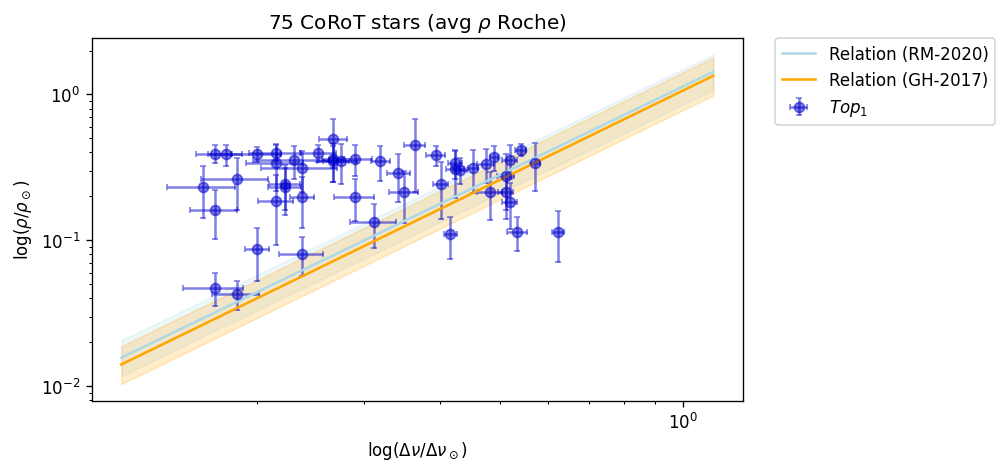

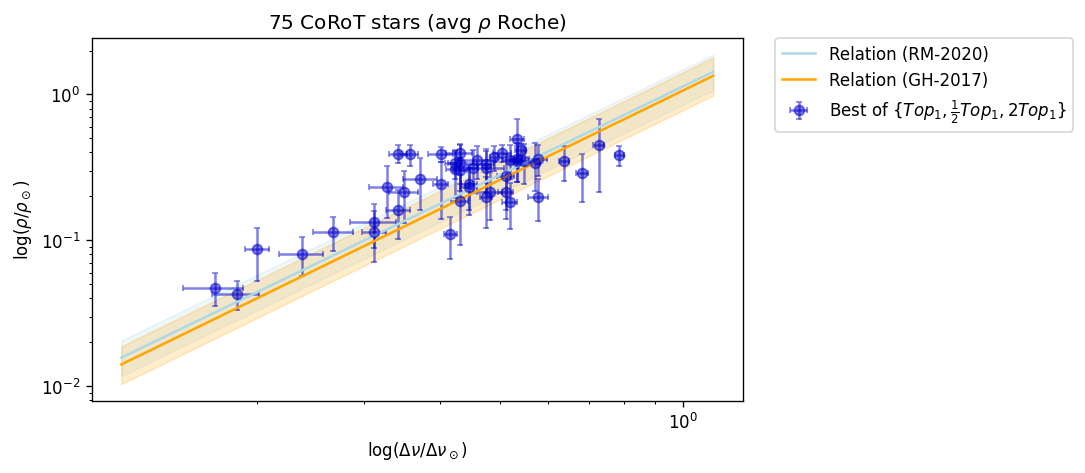

In [33]:
inferences.plot_relation_rodriguez(
    dnus=df_results_corot["top1"].values.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    #points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.12, 1.3),
    #xlim=(0, 0.4),
    #ylim=(0.15, 0.5)
)

inferences.plot_relation_rodriguez(
    dnus=tops_corot.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    #points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.12, 1.3),
    #xlim=(0.2, 0.6),
    #ylim=(0.12, 0.5)
)

In [34]:
selected_stars = [
    102785246,
    102650434,
    102694610,
    102703251,
    102599598,
    102706800,
    102675756,
    102634888,
    102636829,
    102745499,
    102712421,
    102598868,
    102641760,
    102580193,
]

out_stars = df_results_corot[
    (
        df_results_corot["id"].isin(selected_stars)
        & ~pd.isnull(df_results_corot["avg_rho_roche"])
    )
][["id", "avg_rho_roche", "sd_rho_roche", "Teff", "L"]]

in_stars = df_results_corot[
    (
        ~df_results_corot["id"].isin(selected_stars)
        & ~pd.isnull(df_results_corot["avg_rho_roche"])
    )
][["id", "avg_rho_roche", "sd_rho_roche", "Teff", "L"]]


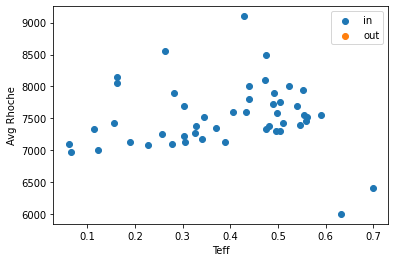

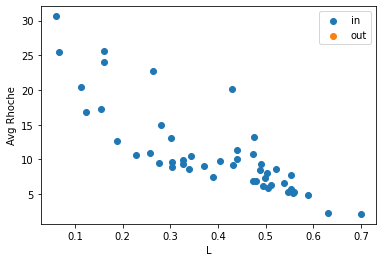

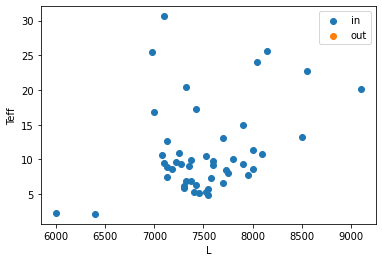

In [35]:
plt.scatter(in_stars[["avg_rho_roche"]], in_stars[["Teff"]], label="in")
plt.scatter(out_stars[["avg_rho_roche"]], out_stars[["Teff"]], label="out")
plt.ylabel("Avg Rhoche")
plt.xlabel("Teff")
plt.legend()
plt.show()


plt.scatter(in_stars[["avg_rho_roche"]], in_stars[["L"]], label="in")
plt.scatter(out_stars[["avg_rho_roche"]], out_stars[["L"]], label="out")
plt.ylabel("Avg Rhoche")
plt.xlabel("L")
plt.legend()
plt.show()

plt.scatter(in_stars[["Teff"]], in_stars[["L"]], label="in")
plt.scatter(out_stars[["Teff"]], out_stars[["L"]], label="out")
plt.ylabel("Teff")
plt.xlabel("L")
plt.legend()
plt.show()

In [36]:
for i, row in df_results_corot.iterrows():
    if row["id"] in selected_stars:
        avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
        plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
        plt.axvline(x=avg_rho_roche, color="green")
        plt.title(row["id"])
        plt.xlim(0.1, 1.0)
        plt.show()